#Práctica 2 SOC
####Ela Katherine Shepherd Arévalo
####Belén García Puente
####Víctor Santamaría Gredilla

In [1]:
import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


-------------------------------------------------------------------
#Estudio Barabasi-Albert

In [2]:
def estudio_red_BA(numnodos_list, m_list, num_iteraciones):
  for N in numnodos_list:
    for M in m_list:
      Grado_Medio = []
      Aristas_Media = []
      Camino_Corto = []
      Comp_conexa = []
      Grado_Cluster = []
      for x in range(num_iteraciones):
        grafo_barabasi = nx.barabasi_albert_graph(N,M)
        #grado medio
        dgDict = dict(grafo_barabasi.degree())
        average_degree = sum(dgDict.values()) / len(dgDict)
        Grado_Medio.append(average_degree)
        #numero de enlaces/numero de aristas
        aristas = len(grafo_barabasi.edges)
        Aristas_Media.append(aristas)
        #media del camino mas corto
        camino = nx.average_shortest_path_length(grafo_barabasi)
        Camino_Corto.append(camino)
        #numero de componentes conexas
        cc = nx.number_connected_components(grafo_barabasi)
        Comp_conexa.append(cc)
        #grado de clustering
        gc = nx.average_clustering(grafo_barabasi)
        Grado_Cluster.append(gc)
      print("Nodos = " + str(N))
      print("m = " + str(M))
      print("          ")
      print("MEDIDAS REALES")
      print("Grado medio = " + str(sum(Grado_Medio)/len(Grado_Medio)))
      print("Nº enlaces = " + str(sum(Aristas_Media)/len(Aristas_Media)))
      print("Camino más corto = " + str(sum(Camino_Corto)/len(Camino_Corto)))     
      print("Grado de clustering = " + str(sum(Grado_Cluster)/len(Grado_Cluster)))
      print("Componentes conexas = " + str(sum(Comp_conexa)/len(Comp_conexa)))
      print("      ")
      print("MEDIDAS TEÓRICAS")
      print("Grado medio = " + str(2*M))
      print("Nº enlaces = " + str(N*M))
      print("Camino más corto = " + str(np.log(N) / np.log(np.log(N))))
      print("Grado de clustering = " + str((np.log(N)**2) / N))
      #Grafica distribucion de grado
      total_deg = []
      for n, deg in grafo_barabasi.degree():
        total_deg.append(deg)
      deg_cnt = collections.Counter(sorted(total_deg))
      deg, cnt = zip(*deg_cnt.items())
      cnt = tuple([x for x in cnt])
      plt.figure(figsize=(8,6))
      plt.bar(deg, cnt, width=0.9)
      plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)
      
      plt.title("Distribucion de grado")
      plt.ylabel("Nº nodos")
      plt.xlabel("Grado")
      plt.show()
      print("-------------------------------------------------------")


Nodos = 501
m = 3
          
MEDIDAS REALES
Grado medio = 5.9640718562874255
Nº enlaces = 1494.0
Camino más corto = 3.2501556886227543
Grado de clustering = 0.04921593362963412
Componentes conexas = 1.0
      
MEDIDAS TEÓRICAS
Grado medio = 6
Nº enlaces = 1503
Camino más corto = 3.402213253600919
Grado de clustering = 0.07713810661885341


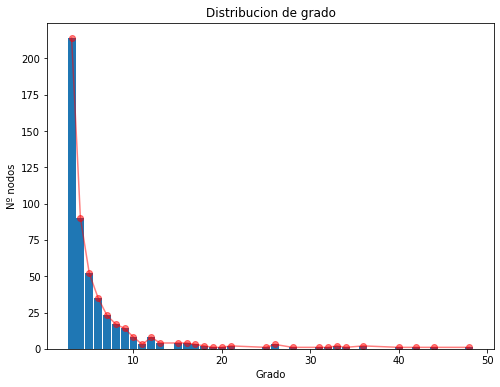

-------------------------------------------------------


In [3]:
estudio_red_BA([501], [3], 1)

In [ ]:
estudio_red_BA([500, 10000], [2, 4], 20)

--------------------------------------------------------------------------
##Generación de redes

In [ ]:
num_nodos = 500
grado_nodos = 4

grafo_barabasi = nx.barabasi_albert_graph(num_nodos,grado_nodos)
#nx.write_graphml(grafo_barabasi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/BA_n500_m4.graphml")
plt.figure(3, figsize = (12,12))
nx.draw_kamada_kawai(grafo_barabasi)


In [ ]:
num_nodos = 500
grado_nodos = 2

grafo_barabasi = nx.barabasi_albert_graph(num_nodos,grado_nodos)
#nx.write_graphml(grafo_barabasi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/BA_n500_m2.graphml")
plt.figure(3, figsize = (12,12))
nx.draw_kamada_kawai(grafo_barabasi)


##Generación red similar a la práctica 1

In [ ]:
estudio_red_BA([10469], [17], 1)

In [ ]:
grafo_barabasi = nx.barabasi_albert_graph(10469,17)
nx.write_graphml(grafo_barabasi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/BA_n10469_m17.graphml")